In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
Data1=pd.read_excel("p:/Titanic Data.xlsx")

In [4]:
Data1.shape

(891, 12)

In [5]:
Data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
Data1.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
Data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
Data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
Data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
Data2=Data1[Data1["Survived"] != 0]

In [12]:
Data2["Survived"].value_counts()

1    342
Name: Survived, dtype: int64

In [13]:
Data2["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [14]:
x=Data2.groupby(by="Pclass")
df_1=pd.DataFrame(x.Survived.sum()).reset_index()
df_1.columns=["Pclass","Survived"]
df_1.sort_values(by="Pclass",ascending=False,inplace=True)
df_1

,Pclass,Survived
2,3,119
1,2,87
0,1,136


# Survival basis on Passenger class

In [15]:
Pclass=[]
Survived=[]
for x,y in zip(df_1["Pclass"],df_1["Survived"]):
    Pclass.append(x)
    Survived.append(y)
    
Pclass    
Survived

[119, 87, 136]

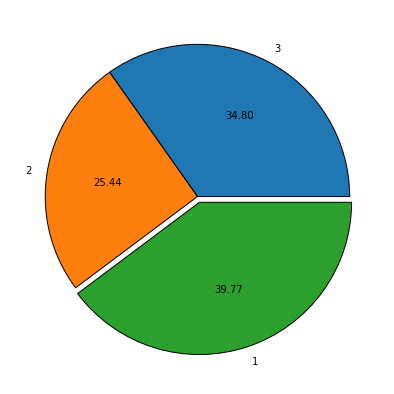

In [16]:
plt.figure(figsize=(12,7))
plt.pie(x=Survived,labels=Pclass,autopct="%.2f",wedgeprops={"edgecolor":"k"},explode=(0,0,.04))
plt.show()

# Survival basis on Gender

In [17]:
x=Data2.groupby(by="Sex")
df_2=pd.DataFrame(x.Survived.sum()).reset_index()
df_2.columns=["Gender","Survived"]
df_2.sort_values(by="Survived",ascending=False,inplace=True)

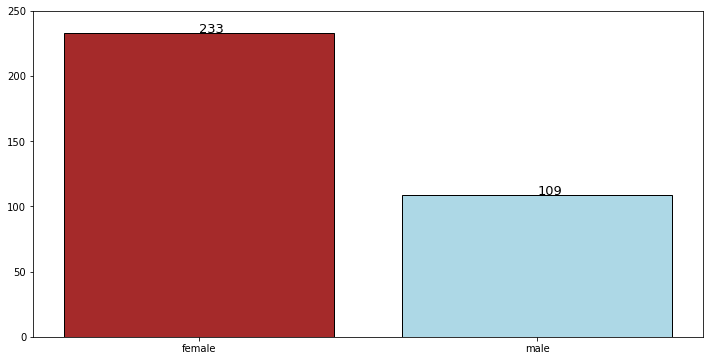

In [18]:
plt.figure(figsize=(12,6))
plt.bar(df_2["Gender"],df_2["Survived"],color=["brown","lightblue"],edgecolor="k")
plt.yticks(range(0,300,50))
for x,y in zip(df_2["Gender"],df_2["Survived"]):
    plt.text(x,y,y,fontdict={"c":"k","size":13})
plt.show()

In [19]:
Data2["Embarked"].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [20]:
Data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [24]:
Data2.replace({"Embarked":"nan"},0,inplace=True)


In [27]:
Data2["Embarked"].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

# Survival basis of embarked according to their Gender

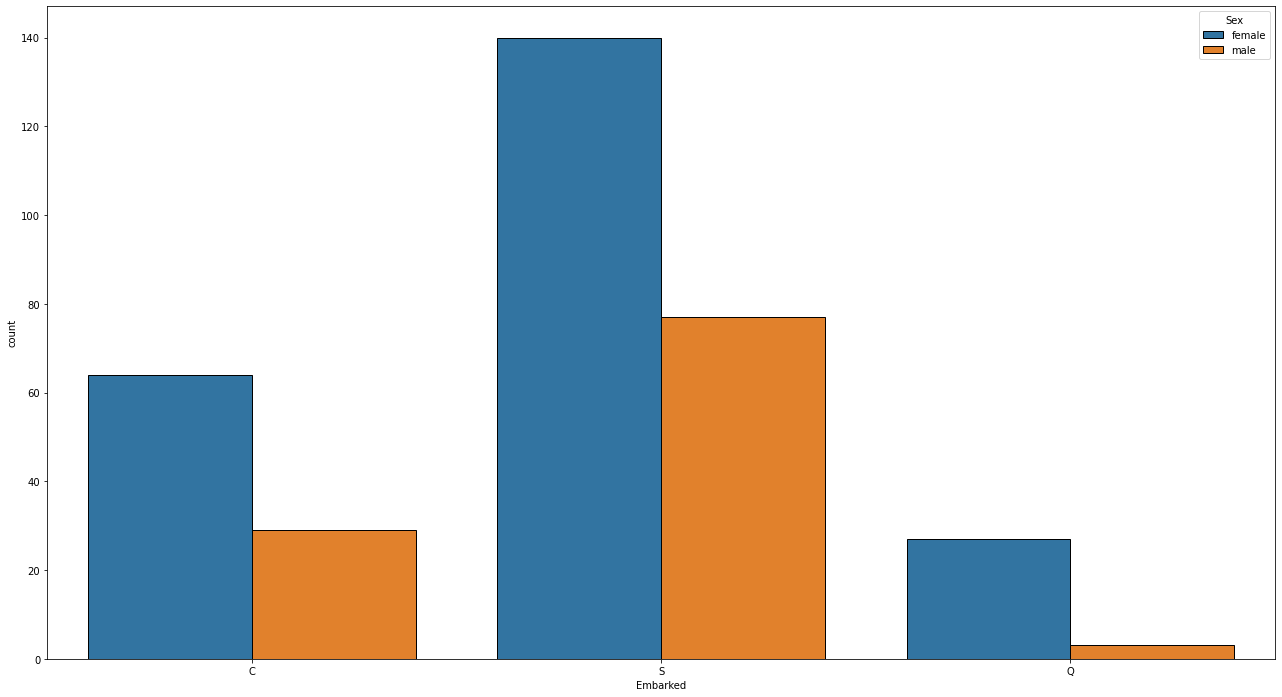

In [45]:
plt.figure(figsize=(22,12))
sb.countplot(x=Data2["Embarked"],hue=Data2["Sex"],edgecolor="k")
plt.show()

# Survival according to their Fare

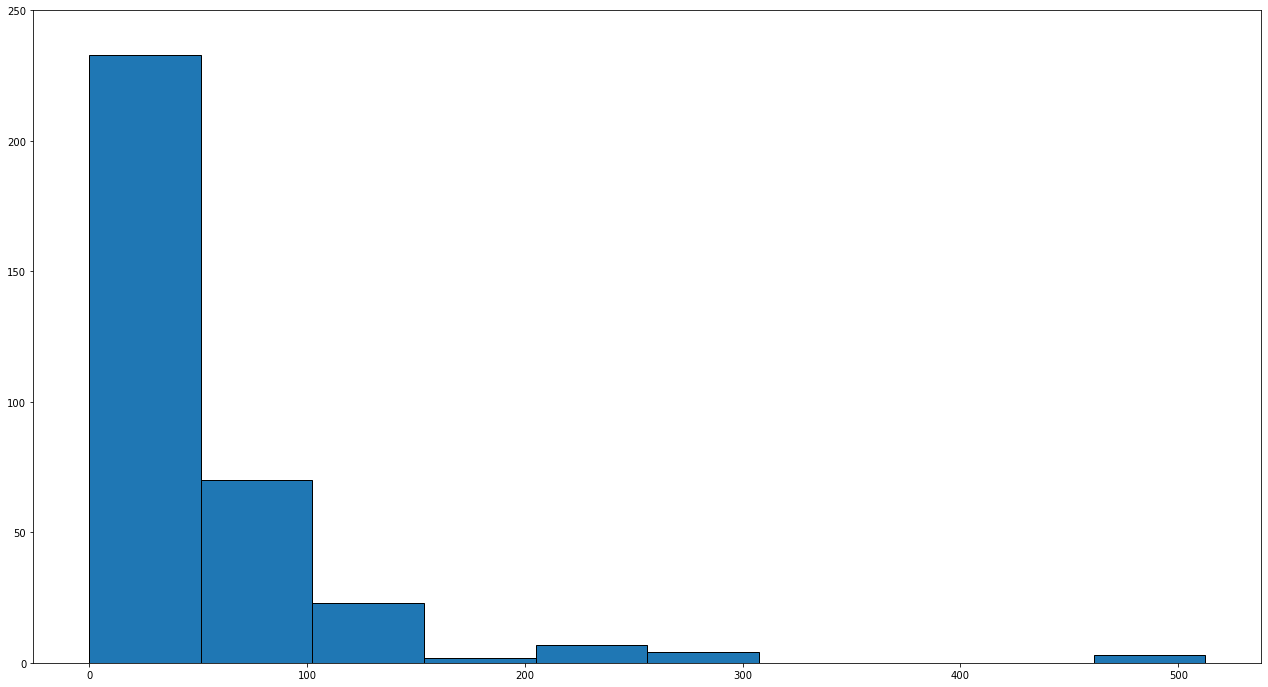

In [58]:
plt.figure(figsize=(22,12))
plt.hist(Data2["Fare"],edgecolor="k",bins=10)
plt.yticks(range(0,300,50))
plt.show()

# Survival according to their age

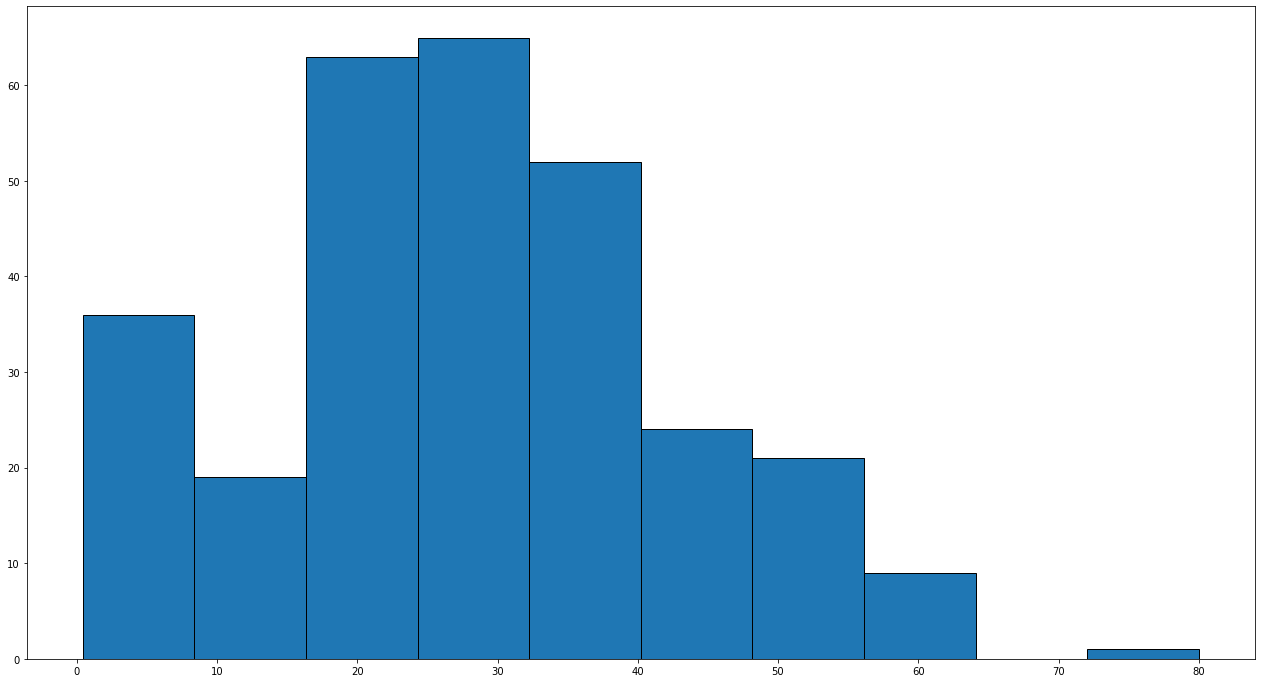

In [67]:
plt.figure(figsize=(22,12))
plt.hist(Data2["Age"],edgecolor="k")
plt.show()